# Defensive Overlay

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import skew, kurtosis

from final_deliverable.utils_final import *

# Load Data

In [2]:
# Load the first sheet of the provided Excel file
df = pd.read_excel('broad_assets_weekly_rets.xlsx')

# Set the 'Date' column as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
df

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2000-07-31,0.0152,0.0757,-0.0023,0.0009,0.0422,0.0050,0.0373,0.0021,-0.0025,-0.0084,-0.0318
2000-08-07,0.0679,0.0526,0.0159,0.0134,0.0365,-0.0237,-0.0196,-0.0116,0.0241,-0.0266,0.0346
2000-08-14,0.0157,0.0023,0.0152,0.0063,0.0171,0.0254,0.0294,0.0369,0.0085,0.0063,0.0481
2000-08-21,0.0095,0.0566,-0.0018,-0.0003,0.0068,-0.0264,0.0016,-0.0024,0.0077,0.0018,0.0384
2000-08-28,0.0184,0.0653,0.0019,0.0041,0.0379,-0.0353,0.0195,-0.0170,0.0019,-0.0095,0.0313
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,0.0607,0.0718,-0.0440,-0.0147,0.0210,0.0425,0.0431,0.0882,0.0093,0.0503,0.0583
2024-08-19,0.1006,0.1346,0.0199,-0.0004,0.1037,0.0321,0.0931,0.0771,-0.0238,0.0239,-0.0377
2024-08-26,0.0020,-0.0266,0.0028,0.0064,0.0450,0.0540,0.0290,-0.0180,-0.0195,0.0097,0.0332


# Calculate Maximum Drawdown on data

In [4]:
pred_binary = pd.read_excel('broad_assets_predictions.xlsx')
date_shifted = pred_binary['Date'].shift(-1)
pred_binary_shifted = pred_binary.copy()
pred_binary_shifted['Date'] = date_shifted
pred_binary_shifted

,Date,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
0,2004-10-18,1,1,1,1,1,1,1,1,1,1,1
1,2004-10-25,1,1,1,1,1,0,1,1,1,1,1
2,2004-11-01,0,0,1,1,0,1,1,0,1,0,1
3,2004-11-08,1,1,1,1,0,1,1,0,1,1,1
4,2004-11-15,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2024-08-12,1,1,1,1,1,1,1,1,1,1,1
1035,2024-08-19,1,1,1,1,1,1,1,1,1,1,1
1036,2024-08-26,1,1,1,1,1,1,1,1,1,1,1
1037,2024-08-30,1,1,1,1,1,1,1,1,1,1,1


In [5]:
pred_binary_shifted = pred_binary_shifted.set_index("Date")

common_dates = df.index.intersection(pred_binary_shifted.index)
# df = df.loc[common_dates]
pred_binary_shifted = pred_binary_shifted.loc[common_dates]

for col in pred_binary_shifted.columns:
    if col in df.columns:
        pred_binary_shifted[col] = pred_binary_shifted[col].where(pred_binary_shifted[col] != 1, df[col])

pred_binary_shifted

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2004-10-18,-0.0187,0.0266,0.0171,0.0121,-0.0196,0.0511,-0.0138,-0.0394,-0.0088,-0.0280,-0.0213
2004-10-25,-0.0345,-0.0350,0.0226,0.0120,-0.0021,0.0000,0.0110,-0.0034,-0.0467,0.0588,0.0639
2004-11-01,0.0000,0.0000,-0.0210,-0.0130,0.0000,0.0671,0.0500,0.0000,0.0065,0.0000,-0.0840
2004-11-08,0.0616,0.0518,-0.0201,-0.0148,0.0000,-0.0118,0.0599,0.0000,-0.0269,0.0197,-0.0139
2004-11-15,0.0337,0.0446,0.0110,0.0038,0.0733,0.0978,0.0328,0.0749,0.0000,0.0218,-0.0372
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,-0.1012,-0.1221,0.1267,0.0494,-0.1713,-0.0276,-0.0737,-0.0862,-0.0351,0.0208,-0.0243
2024-08-12,0.0607,0.0718,-0.0440,-0.0147,0.0210,0.0425,0.0431,0.0882,0.0093,0.0503,0.0583
2024-08-19,0.1006,0.1346,0.0199,-0.0004,0.1037,0.0321,0.0931,0.0771,-0.0238,0.0239,-0.0377


In [6]:
# Calculate cumulative returns
cumulative_returns = (1 + pred_binary_shifted).cumprod()

# Calculate rolling maximum
rolling_max = cumulative_returns.cummax()

# Calculate drawdown
drawdown = (cumulative_returns - rolling_max) / rolling_max

# Identify drawdown periods (boolean mask)
drawdown_periods = drawdown < -0.05  # Threshold: 5% drawdown

In [7]:
drawdown_periods

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2004-10-18,False,False,False,False,False,False,False,False,False,False,False
2004-10-25,False,False,False,False,False,False,False,False,False,False,False
2004-11-01,False,False,False,False,False,False,False,False,False,False,True
2004-11-08,False,False,False,False,False,False,False,False,True,False,True
2004-11-15,False,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,True,True,True,True,True,True,True,True,True,True,True
2024-08-12,True,True,True,True,True,True,True,True,True,False,True
2024-08-19,False,True,True,True,True,True,False,True,True,False,True


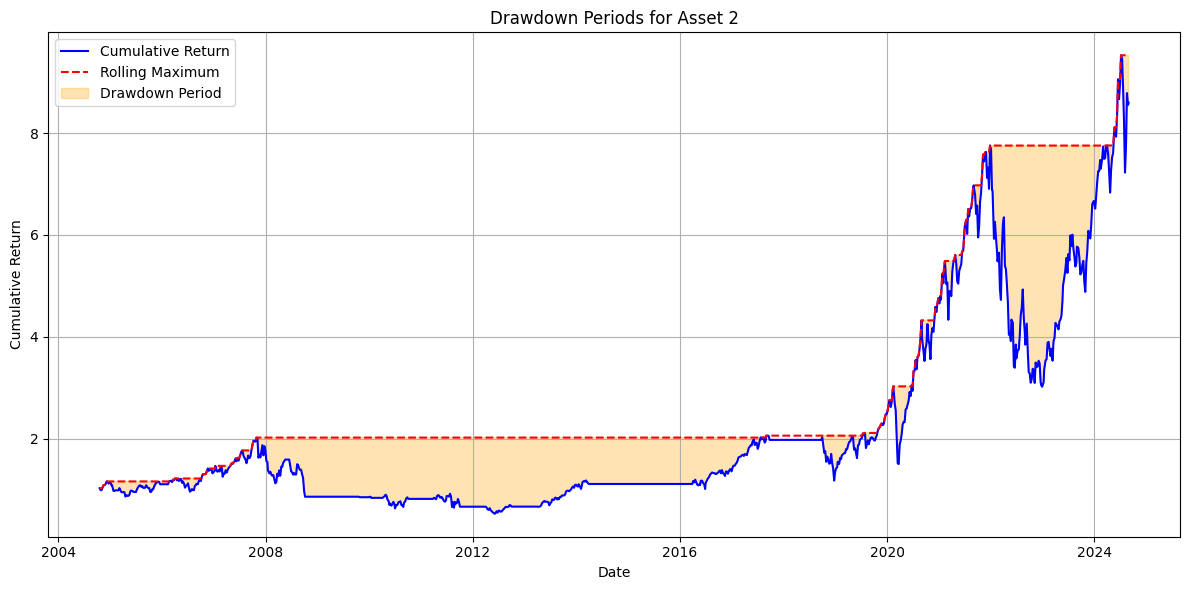

In [8]:
# Plot cumulative returns and drawdown for one asset (e.g., 'Asset1')
asset = 'Asset 2'

plt.figure(figsize=(12, 6))

# Plot cumulative returns and rolling maximum
plt.plot(cumulative_returns[asset], label="Cumulative Return", color="blue")
plt.plot(rolling_max[asset], label="Rolling Maximum", color="red", linestyle="--")

# Highlight drawdown periods
plt.fill_between(
    drawdown.index,
    cumulative_returns[asset],
    rolling_max[asset],
    where=drawdown_periods[asset],
    color="orange",
    alpha=0.3,
    label="Drawdown Period"
)

plt.title(f"Drawdown Periods for {asset}")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate risk signals

In [9]:
# Sample data
portfolio_weights = pd.read_excel('classification_broad_assets_Sharpe_weight.xlsx')

portfolio_weights = portfolio_weights.set_index('Date')
# Skewness/ Vol/ VAR (expanding/rolling window)
# Compare different metrics' results


In [10]:
rolling_volatility = pred_binary_shifted.rolling(window=21, min_periods=8).std()
rolling_volatility

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2004-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,0.0353,0.0535,0.0462,0.0185,0.0610,0.0428,0.0308,0.0380,0.0163,0.0399,0.0322
2024-08-12,0.0376,0.0558,0.0453,0.0175,0.0605,0.0418,0.0323,0.0427,0.0162,0.0402,0.0324
2024-08-19,0.0430,0.0626,0.0454,0.0174,0.0637,0.0419,0.0380,0.0456,0.0167,0.0403,0.0333


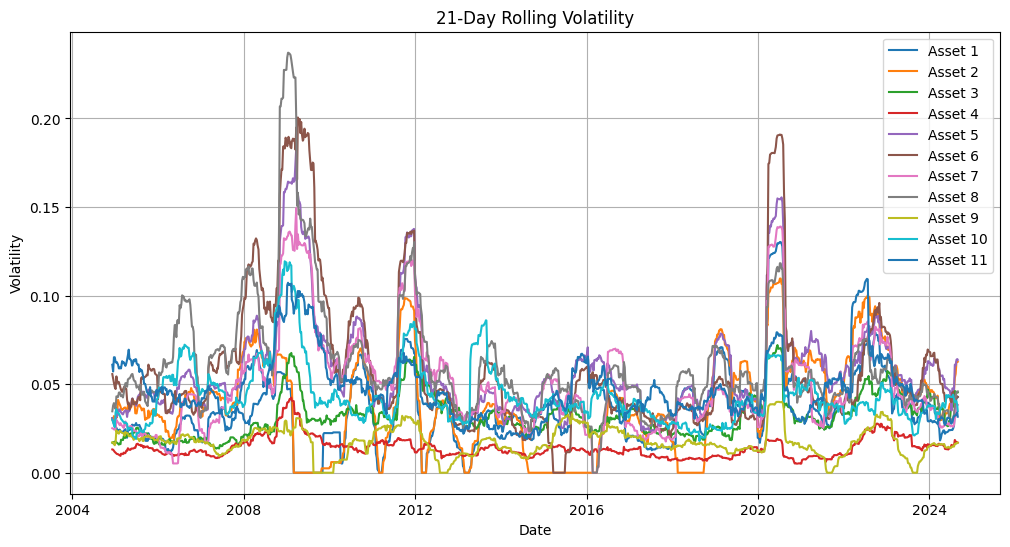

In [11]:
selected_assets = pred_binary_shifted  # Plot the first 3 assets for simplicity

plt.figure(figsize=(12, 6))
for asset in selected_assets:
    plt.plot(rolling_volatility.index, rolling_volatility[asset], label=asset)

plt.title("21-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid()
plt.show()

In [12]:
def calculate_rolling_var(df, window=20, confidence_level=0.05):
    var_df = df.rolling(window=window).apply(
        lambda x: np.percentile(x, confidence_level * 100), raw=True
    )
    return var_df

rolling_var = calculate_rolling_var(pred_binary_shifted, window=20, confidence_level=0.05)

<Axes: title={'center': 'Rolling VaR (95%) for Each Asset'}, xlabel='Date'>

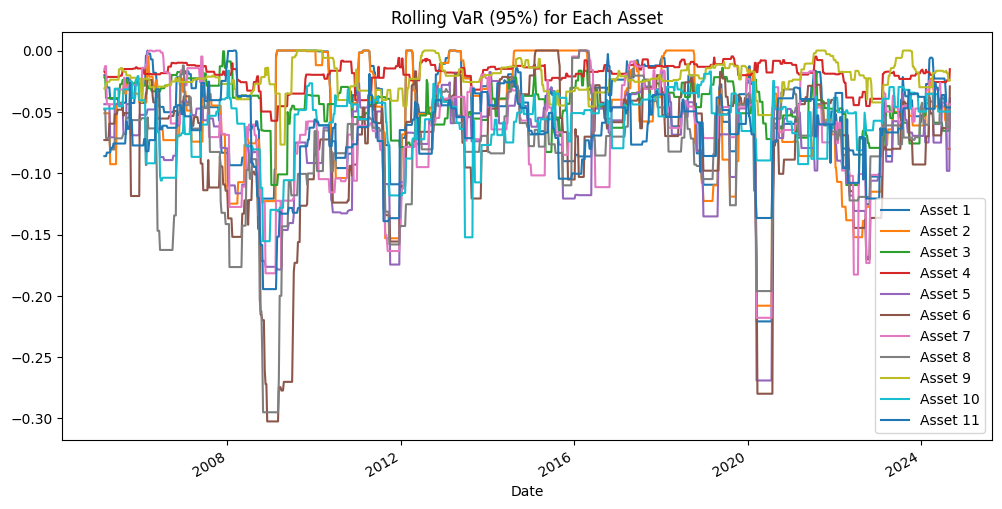

In [13]:
rolling_var.plot(figsize=(12, 6), title="Rolling VaR (95%) for Each Asset")

# Apply the Defensive Overlay dynamically

### Description：

The function dynamically applies a defensive overlay at the asset level based on three signals: rolling volatility, rolling VaR, and drawdown periods. Assets are categorized as “low risk” if they fall in the bottom 30% of volatility, satisfy a VaR threshold, or are not in a drawdown period. These low-risk assets remain untouched. For other assets, the function dynamically adjusts their weights based on risk signals, allocating a portion of their weight to cash while normalizing the portfolio weights.

In [14]:
def apply_dynamic_defensive_overlay(portfolio_weights, rolling_volatility, rolling_var, drawdown_period, 
                                     cash_allocation=0.3, volatility_threshold=0.3, var_threshold=0.3):
    """
    Dynamically adjusts portfolio weights based on rolling volatility, rolling VaR, and drawdown periods.

    Args:
        portfolio_weights (pd.DataFrame): Portfolio weights of assets.
        rolling_volatility (pd.DataFrame): Asset-specific rolling volatility.
        rolling_var (pd.DataFrame): Asset-specific rolling VaR.
        drawdown_period (pd.DataFrame): Boolean DataFrame indicating drawdown periods (True for drawdown).
        cash_allocation (float): Percentage of the weight allocated to cash during high risk.
        volatility_threshold (float): Percentile threshold for low/high volatility (e.g., 0.3 for bottom 30% or top 30%).
        var_threshold (float): Percentile threshold for low/high VaR (e.g., 0.3 for bottom 30% or top 30%).

    Returns:
        pd.DataFrame: Adjusted portfolio weights with defensive overlay applied dynamically.
    """
    # Create a DataFrame for adjusted weights
    adjusted_weights = portfolio_weights.copy()
    adjusted_weights['Cash'] = 0.0  # Add a cash column

    # Loop over dates and assets
    for date in adjusted_weights.index:
        # Filter historical data up to the current date
        past_vol = rolling_volatility.loc[:date]
        past_var = rolling_var.loc[:date]

        # Calculate percentiles for the current date and historical data
        vol_threshold_value_low = past_vol.quantile(volatility_threshold)
        vol_threshold_value_high = past_vol.quantile(1 - volatility_threshold)
        var_threshold_value_low = past_var.quantile(var_threshold)
        var_threshold_value_high = past_var.quantile(1 - var_threshold)

        # Identify low-risk assets
        low_risk_assets = []
        for asset in portfolio_weights.columns:
            if (rolling_volatility.loc[date, asset] <= vol_threshold_value_low[asset] and
                rolling_var.loc[date, asset] >= var_threshold_value_high[asset] and
                not drawdown_period.loc[date, asset]):
                low_risk_assets.append(asset)

        # Adjust weights for high-risk assets
        for asset in portfolio_weights.columns:
            if (rolling_volatility.loc[date, asset] > vol_threshold_value_high[asset] or
                rolling_var.loc[date, asset] < var_threshold_value_low[asset] or
                drawdown_period.loc[date, asset]):
                # Reduce weight for high-risk assets and allocate to cash
                adjusted_weights.loc[date, asset] *= (1 - cash_allocation)
                adjusted_weights.loc[date, 'Cash'] += cash_allocation / len(portfolio_weights.columns)

        # Normalize weights to ensure they sum to 1
        adjusted_weights.loc[date, :] /= adjusted_weights.loc[date, :].sum()

    return adjusted_weights


# Apply the updated defensive overlay function
adjusted_portfolio_asset_weight = apply_dynamic_defensive_overlay(
    portfolio_weights, rolling_volatility, rolling_var, drawdown_periods, 
    cash_allocation=0.3, volatility_threshold=0.3, var_threshold=0.3
)

1.	Inputs:
	- portfolio_weights: DataFrame containing portfolio weights for each asset.
	- rolling_volatility: DataFrame with rolling volatility values for each asset.
	- rolling_var: DataFrame with rolling VaR values for each asset.
	- drawdown_period: Boolean DataFrame indicating whether each asset is in a drawdown period.
	- cash_allocation: The fraction of the weight to allocate to cash for high-risk assets.
	- volatility_threshold: Threshold for low volatility classification (bottom 30% by default).
	- var_threshold: VaR threshold for low risk classification.
2.	Low-risk asset identification:
	- An asset is considered low risk if:
	- Its volatility is in the bottom 30% (<= rolling_volatility.quantile(volatility_threshold)).
	- Its VaR is above the specified threshold (> var_threshold).
	- It is not in a drawdown period (not drawdown_period).
3.	High-risk asset adjustment:
	- For assets not classified as low risk:
	- Reduce their weights by (1 - cash_allocation).
	- Allocate the reduced weight to cash evenly across all assets.
4.	Normalization:
	- Ensure that the total weights, including cash, sum to 1 for each date.

In [15]:
# Display the adjusted portfolio weights
adjusted_portfolio_asset_weight

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11,Cash
Date,,,,,,,,,,,,
2005-10-17,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4005,0.4024,0.0000,0.1971
2005-10-24,0.0000,0.0000,0.0000,0.1274,0.0000,0.0000,0.0000,0.0000,0.6466,0.0000,0.0000,0.2260
2005-10-31,0.0373,0.0266,0.0776,0.1626,0.0000,0.0000,0.0000,0.0000,0.4538,0.0000,0.0000,0.2422
2005-11-07,0.0620,0.4636,0.0000,0.0000,0.1613,0.0000,0.0000,0.0000,0.0358,0.0000,0.0000,0.2774
2005-11-14,0.0000,0.4575,0.0000,0.0000,0.1383,0.0120,0.0000,0.1119,0.0000,0.0000,0.0000,0.2804
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,0.0000,0.0000,0.4348,0.0000,0.0000,0.2652,0.0000,0.0000,0.0000,0.0000,0.0000,0.3000
2024-08-12,0.0000,0.0000,0.4781,0.0535,0.0000,0.1690,0.0000,0.0000,0.0000,0.0207,0.0000,0.2786
2024-08-19,0.0000,0.0000,0.4965,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2863,0.0000,0.2172


In [16]:
def calculate_portfolio_returns(weights_df, returns_df):
    """
    Calculate the daily portfolio returns by aligning dates, multiplying asset weights with their corresponding returns.

    Args:
        weights_df (pd.DataFrame): DataFrame containing portfolio weights (including 'Cash').
        returns_df (pd.DataFrame): DataFrame containing asset returns.

    Returns:
        pd.Series: Daily portfolio returns.
    """
    # Align the index (dates) of weights and returns DataFrames
    returns_df_use = returns_df.tail(len(weights_df))

    # Remove the 'Cash' column from weights
    weights_no_cash = weights_df.drop(columns=['Cash'])

    # Ensure the weights and returns DataFrames align on columns (assets)
    weights_no_cash = weights_no_cash[returns_df_use.columns]

    # Calculate daily portfolio returns
    daily_portfolio_returns = np.sum(weights_no_cash * returns_df_use.values, axis=1)

    return daily_portfolio_returns

def calculate_cum_return(ret):
    res = []
    cum_sum = 1
    for i in range(len(ret)):
        cum_sum*=(1+ret[i])
        res.append(cum_sum)
    return res


weekly_returns = calculate_portfolio_returns(adjusted_portfolio_asset_weight, df)

In [17]:
def summary_statistics_annualized(returns, annual_factor=52):
    summary_statistics = pd.DataFrame(index=[0])
    summary_statistics['Mean'] = returns.mean()*annual_factor
    summary_statistics['Vol'] = returns.std()*np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = (returns.mean()/returns.std())*np.sqrt(annual_factor)
    summary_statistics['Min'] = returns.min()
    summary_statistics['Max'] = returns.max()
    summary_statistics['Skewness'] = skew(returns)
    summary_statistics['Excess Kurtosis'] = kurtosis(returns)
    summary_statistics['VaR (0.05)'] = np.quantile(returns, 0.05)
    summary_statistics['CVaR (0.05)'] = returns[returns<=np.quantile(returns, 0.05)].mean()
    cumulative_returns = np.cumprod(1+returns)
    rolling_max = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns-rolling_max)/rolling_max
    max_drawdown = drawdown.min()
    summary_statistics['Max Drawdown'] = max_drawdown
    return summary_statistics


In [18]:
summary_statistics_annualized(weekly_returns)

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown
0,0.1313,0.2283,0.5753,-0.1323,0.1657,0.0201,3.2909,-0.0508,-0.0747,-0.3578


<Axes: xlabel='Date'>

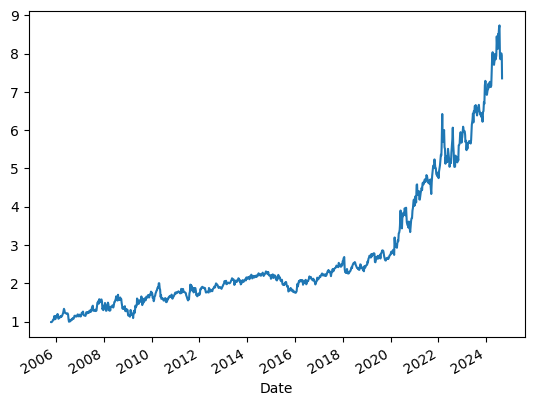

In [19]:
weekly_returns = pd.DataFrame(weekly_returns, columns = ['Return'])
weekly_returns['CumRet'] = calculate_cum_return(weekly_returns['Return'])
weekly_returns['CumRet'].plot()

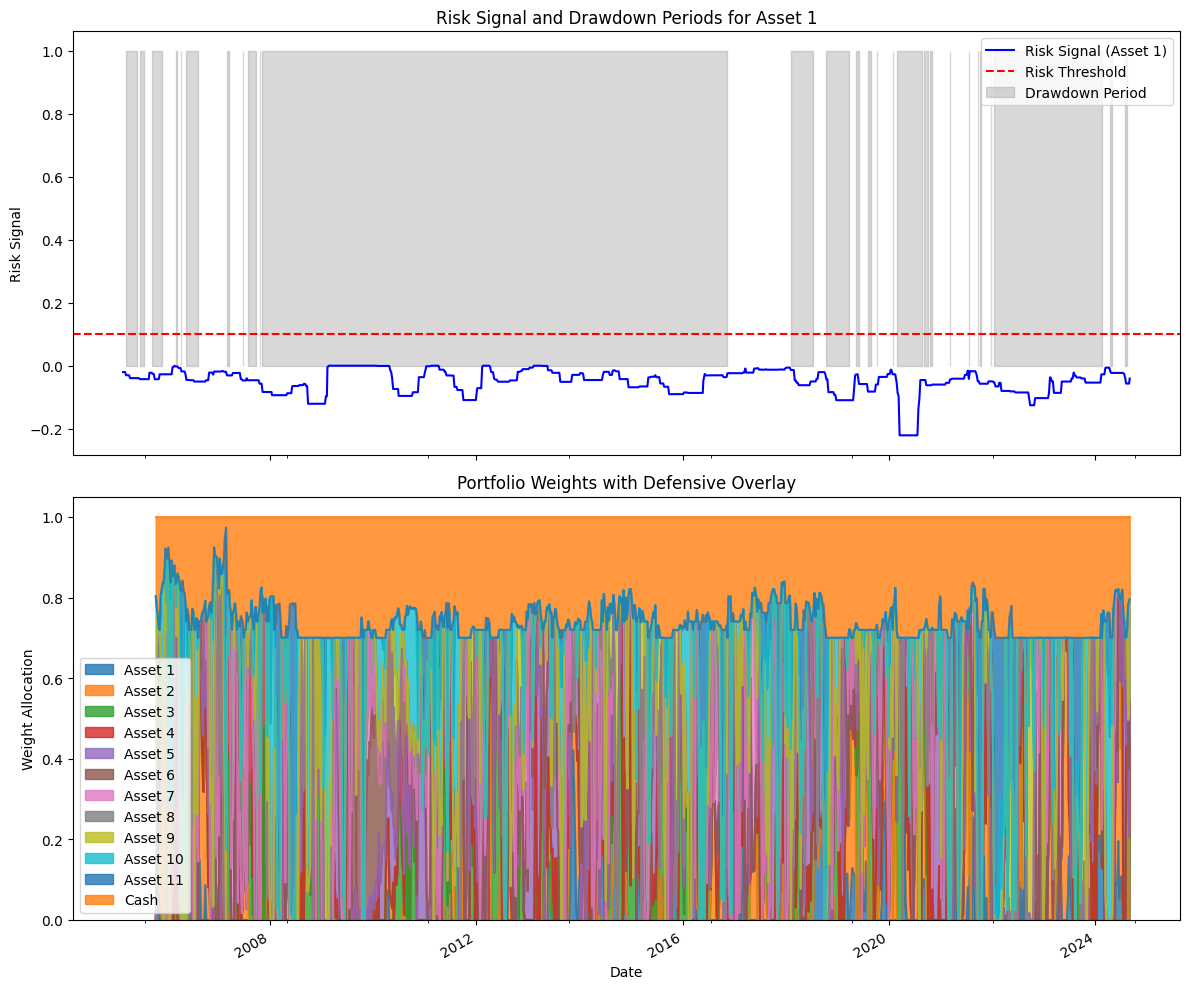

In [20]:
# Updated Visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Example risk signal for Asset1
example_asset = 'Asset 1'

# Plot the risk signal and drawdown periods for the example asset
ax[0].plot(rolling_var[example_asset], label=f"Risk Signal ({example_asset})", color="blue")
ax[0].axhline(y=0.1, color="red", linestyle="--", label="Risk Threshold")
ax[0].fill_between(
    rolling_volatility.index,
    0,
    1,
    where=drawdown_periods[example_asset],
    color="gray",
    alpha=0.3,
    label="Drawdown Period"
)
ax[0].set_title(f"Risk Signal and Drawdown Periods for {example_asset}")
ax[0].set_ylabel("Risk Signal")
ax[0].legend()

# Plot adjusted portfolio weights as an area plot
adjusted_portfolio_asset_weight.plot.area(ax=ax[1], alpha=0.8)
ax[1].set_title("Portfolio Weights with Defensive Overlay")
ax[1].set_ylabel("Weight Allocation")
ax[1].set_xlabel("Date")

plt.tight_layout()
plt.show()

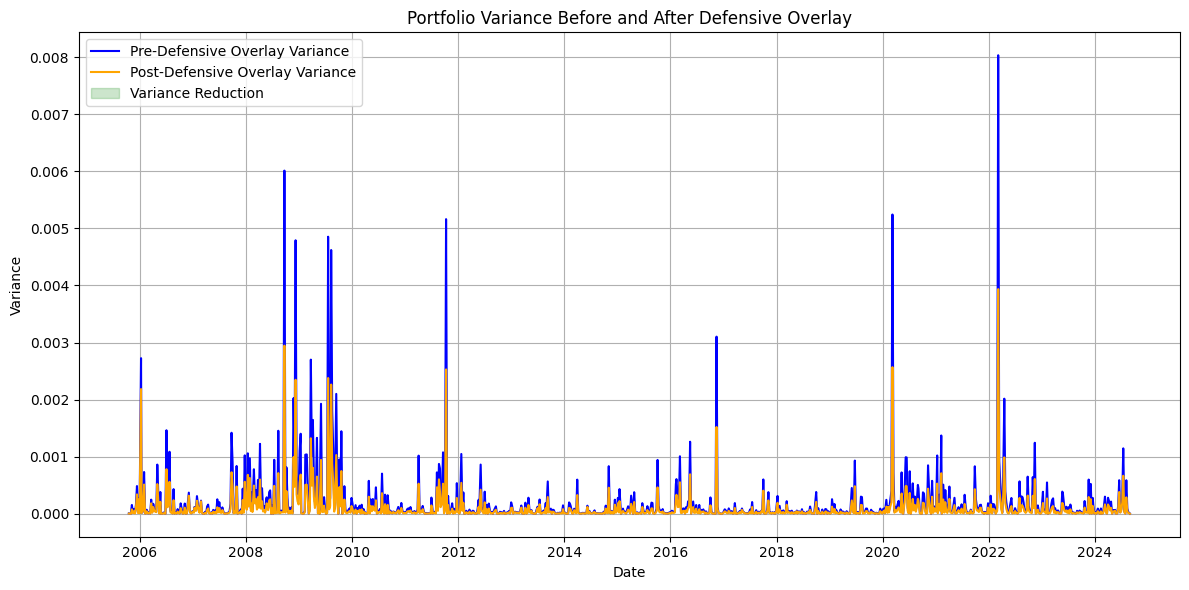

In [21]:
# Ensure variance calculations are based on asset returns
pre_defensive_variance = (df * portfolio_weights).var(axis=1).astype(float)
post_defensive_variance = (df * adjusted_portfolio_asset_weight.drop(columns="Cash")).var(axis=1).astype(float)

# Align indices to avoid mismatches
aligned_indices = pre_defensive_variance.index.intersection(post_defensive_variance.index)
pre_defensive_variance = pre_defensive_variance.loc[aligned_indices]
post_defensive_variance = post_defensive_variance.loc[aligned_indices]

# Convert data explicitly to numpy arrays for compatibility with fill_between
aligned_indices = aligned_indices.to_numpy()
pre_defensive_variance_np = pre_defensive_variance.to_numpy()
post_defensive_variance_np = post_defensive_variance.to_numpy()
where_condition_np = pre_defensive_variance_np > post_defensive_variance_np

# Re-plot with numpy arrays
plt.figure(figsize=(12, 6))
plt.plot(aligned_indices, pre_defensive_variance_np, label="Pre-Defensive Overlay Variance", color="blue")
plt.plot(aligned_indices, post_defensive_variance_np, label="Post-Defensive Overlay Variance", color="orange")
plt.fill_between(
    aligned_indices, 
    pre_defensive_variance_np, 
    post_defensive_variance_np, 
    where=where_condition_np, 
    color="green", alpha=0.2, label="Variance Reduction"
)
plt.title("Portfolio Variance Before and After Defensive Overlay")
plt.xlabel("Date")
plt.ylabel("Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()